# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Цель и задачи исследования

Цель данного исследования является анализ данных о продажах квартир в Санкт-Петербурге и Ленинградской области за последние несколько лет для выявления параметров, влияющих на рыночную стоимость квартиры. Данное исследование поможет пользователям сервиса Яндекс.Недвижимость осознанно выбирать квартиру для приобретения, ориентируясь на праметры, которые наиболее сильно влияют на цену объекта.  

План исследования состоит из 5 шагов:
1. Первичное изучение предоставленных данных
2. Предобработка данных(заполнение или удаление пропусков, преобразование типов данных, замена и удаление дубликатов, обработка аномальных значений)
3. Добавление в таблицу новых параметров, необходимых для дальнейшего исследования. 
4. Проведение исследовательского анализа данных(изучение параметров, анализ факторов, влияющих на стоимость квартир, построение графиков, отражающих проведенный анализ)
5. Общий вывод

В итоге мы получим параметры, которые наиболее сильно коррелируют с ценой объекта недвижимости в Санкт-Петербурге и Ленинградской области.

### Откройте файл с данными и изучите общую информацию. 

In [1]:
#Импортируем все необходимые библиотеки и откроем файл.
import warnings
warnings.filterwarnings('ignore')
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('real_estate_data.csv', sep='\t')
data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5.0,73.3,3,NaN,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,NaN,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.00,17.0,NaN,12,NaN,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

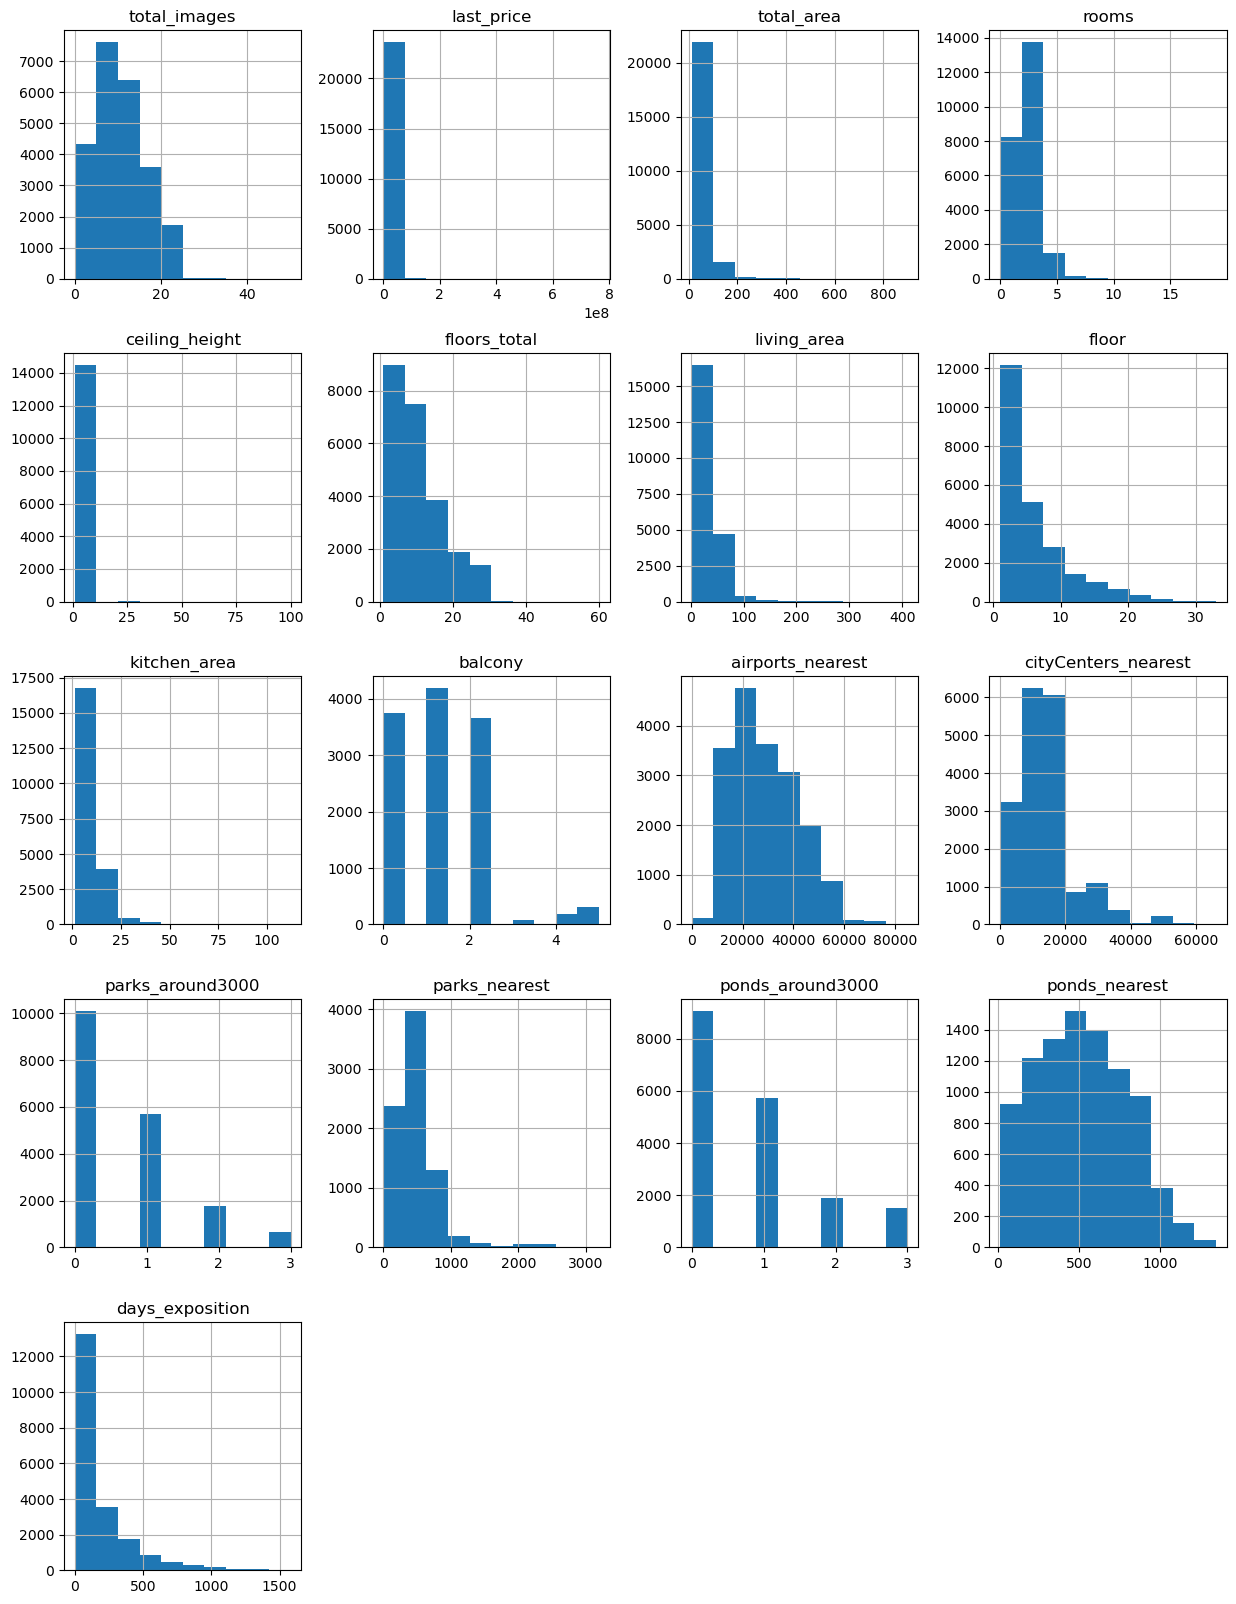

In [4]:
#Построим общую гистограмму для всех числовых столбцов таблицы.
data.hist(figsize=(15, 20))
plt.show()

Датасет состоит из 22 колонок и 23699 строк. В 13 колонках есть пропуски.

### Предобработка данных

In [5]:
#Всего в таблице 23699 строк. Рассмотрим переменные которые содержат пропуски. 
#Для этого выведем количество пропущенных значений для каждого столбца.
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

По итогу проверки, мы обнаружили, что в 13 столбцах есть пропущенные значения. Рассмотрим все столбцы по порядку. 

In [6]:
#В параметре locality_name мы видим названия места, где находится квартира. Пропуски в данном столбце мы можем заменить на "неизвестно" 
data['locality_name'] = data['locality_name'].fillna('неизвестно')

In [7]:
#При рассмотрении столбца locality_name мы также обнаружили неявные дубликаты, которые следует переименовать. 
data['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

In [8]:
#Посчитаем количество уникальных значений до удаления дубликатов 
before = data['locality_name'].nunique()

In [9]:
#Удалим типы населённых пунктов
def locality_name_right(row):
    if 'садоводческое некоммерческое товарищество ' in row:
        row = row.replace('садоводческое некоммерческое товарищество ', '')
        return ''
    if 'поселок городского типа ' in row:
        row = row.replace('поселок городского типа ', '')
        return ''
    if 'посёлок городского типа ' in row:
        row = row.replace('посёлок городского типа ', '')
        return ''
    if 'коттеджный поселок ' in row:
        row = row.replace('коттеджный поселок ', '')
        return ''
    if 'коттеджный посёлок ' in row:
        row = row.replace('коттеджный посёлок ', '')
        return ''
    if 'посёлок при железнодорожной станции ' in row:
        row = row.replace('посёлок при железнодорожной станции ', '')
        return ''
    if 'городской посёлок ' in row:
        row = row.replace('городской посёлок ', '')
        return row
    if 'городской поселок ' in row:
        row = row.replace('городской поселок ', '')
        return row
    if 'поселок станции ' in row:
        row = row.replace('поселок станции ', '')
        return row
    if 'посёлок ' in row:
        row = row.replace('посёлок ', '')
        return row
    if 'поселок ' in row:
        row = row.replace('поселок ', '')
        return row
    if 'деревня ' in row:
        row = row.replace('деревня ', '')
        return row
    if 'садовое товарищество ' in row:
        row = row.replace('садовое товарищество ', '')
        return row
    if 'село ' in row:
        row = row.replace('село ', '')
        return row
    else:
        return row
data['locality_name'] = data['locality_name'].apply(locality_name_right)
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', '', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кронштадт', 'Кировск', 'Новое Девяткино', 'Металлострой',
       'Молодцово', 'Новая Ропша', 'Павловск', 'Пикколово', 'Всеволожск',
       'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк', 'Куттузи',
       'Аннино', 'Плодовое', 'Заклинье', 'Торковичи', 'Первомайское',
       'Красное Село', 'Понтонный', 'Сясьстрой', 'Старая', 'Лесколово',
       'Новый Свет', 'Сланцы', 'Путилово', 'Ивангород', 'Шлиссельбург',
       'Никольское', 'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино',
       'Романовка', 'Бугры', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Тосно', 'Стрельна', 'Бокситогорск', 'Александровская',
       'Лопухинка', 'Пикалёво', 'Терволово', 'Подпорожье', 'Петровское',
       'С

In [10]:
#Посчитаем количество уникальных значений после удаления дубликатов 
after = data['locality_name'].nunique()
#Выведем от какого количества дубликатов нам удалось избавиться 
result = before - after
result

80

Таким образом, нам удалось очистить данные locality_name от 80 дубликатов.

In [11]:
#Заполним в столбце'ceiling_height' пропуски медианными значениями в зависимости от расположения квартиры. 
for locality_name in data['locality_name'].unique():
    median_ceiling_height = data.loc[data['locality_name']==locality_name, 'ceiling_height'].median()
    data.loc[(data['ceiling_height'].isna()) &
        (data['locality_name']==locality_name), 'ceiling_height'] = median_ceiling_height
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median()) #уберём остальные пропуски в столбце
data['ceiling_height'].isna().sum()


0

In [12]:
#Заполним в столбце'floors_total' пропуски медианными значениями в зависимости от расположения квартиры. 
for locality_name in data['locality_name'].unique():
    median_floors_total = data.loc[data['locality_name']==locality_name, 'floors_total'].median()
    data.loc[(data['floors_total'].isna()) &
        (data['locality_name']==locality_name), 'floors_total'] = median_floors_total
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median()) #уберём остальные пропуски в столбце
data['floors_total'] = data['floors_total'].astype('int') #Заменим данные на целочисленные.
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34, 60,  1, 29, 33,
       52, 37])

In [13]:
#Параметр living_area (жилая площадь в квадратных метрах (м²)) можем заполнить с помощью данных total_area 
#Для начала посчитаем медианный процент жилой площоди от общей  
data_living_area_percentage = data['living_area'].median()/data['total_area'].median()
data['living_area'].fillna(data_living_area_percentage * data['total_area'], inplace=True)
#Аналогичные действия выполним и для параметра kitchen_area
data_kitchen_area_percentage = data['kitchen_area'].median()/data['total_area'].median()
data['kitchen_area'].fillna(data_kitchen_area_percentage * data['total_area'], inplace=True)

In [14]:
#Параметр is_apartment указывает на тип квартир - апартаменты. 
#Скорее всего, если в описании не указано, что объект является апартаментом, то это квартира. 
#Поэтому заменим пустые строки значением False.
data['is_apartment'] = data['is_apartment'].fillna(value=False)

In [15]:
#Параметр balcony указывает на количество балконов в квартире. Если строки пустые, значит скорее всего балкона в квартире вовсе нет 
#Пустые строки заменим на 0. 
data['balcony'] = data['balcony'].fillna(0)
#Также изменим тип данных на целочисленные
data['balcony'] = data['balcony'].astype('int')

In [16]:
#airports_nearest показывает растояние от квартиры до ближайщего аэропорта. 
#Заполним в столбце'airports_nearest' пропуски медианным значением по расположению квартиры. 
for locality_name in data['locality_name'].unique():
    median_airport = data.loc[data['locality_name']==locality_name, 'airports_nearest'].median()
    data.loc[(data['airports_nearest'].isna()) &
        (data['locality_name']==locality_name), 'airports_nearest'] = median_airport
data['airports_nearest'] = data['airports_nearest'].fillna(data['airports_nearest'].median()) #уберём остальные пропуски в столбце

In [17]:
#Аналогичные действия проведём с параметрами cityCenters_nearest, parks_nearest, ponds_nearest
for locality_name in data['locality_name'].unique():
    median_cityCenters = data.loc[data['locality_name']==locality_name, 'cityCenters_nearest'].median()
    data.loc[(data['cityCenters_nearest'].isna()) &
        (data['locality_name']==locality_name), 'cityCenters_nearest'] = median_cityCenters
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].median())

for locality_name in data['locality_name'].unique():
    median_parks_nearest = data.loc[data['locality_name']==locality_name, 'parks_nearest'].median()
    data.loc[(data['parks_nearest'].isna()) &
        (data['locality_name']==locality_name), 'parks_nearest'] = median_parks_nearest
data['parks_nearest'] = data['parks_nearest'].fillna(data['parks_nearest'].median())

for locality_name in data['locality_name'].unique():
    median_ponds_nearest = data.loc[data['locality_name']==locality_name, 'ponds_nearest'].median()
    data.loc[(data['ponds_nearest'].isna()) &
        (data['locality_name']==locality_name), 'ponds_nearest'] = median_ponds_nearest
data['ponds_nearest'] = data['ponds_nearest'].fillna(data['ponds_nearest'].median())

In [18]:
#Для оставщихся параметров parks_around3000, ponds_around3000, days_exposition заменяем пропуски на 0 значение.
for i in data:
    data[i] = data[i].fillna(0)
    i = {'parks_around3000', 'ponds_around3000', 'days_exposition'}

In [19]:
#Заменим данные в столбцах parks_around3000, ponds_around3000, days_exposition на целочисленные,
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')
data['days_exposition'] = data['days_exposition'].astype('int')

In [20]:
#Рассмотрим уникальные значения в столбце ceiling_height (высота потолков (м)).
data['ceiling_height'].unique()

array([  2.7  ,   2.63 ,   3.03 ,   2.65 ,   2.64 ,   2.5  ,   2.67 ,
         2.55 ,   2.6  ,   2.56 ,   3.05 ,   2.75 ,   2.9  ,   2.56 ,
         2.8  ,   3.   ,   3.2  ,   2.61 ,   2.555,   3.25 ,   3.45 ,
         2.77 ,   2.85 ,   2.57 ,   4.15 ,   3.5  ,   3.3  ,   2.71 ,
         4.   ,   2.47 ,   2.73 ,   2.84 ,   3.1  ,   2.34 ,   3.4  ,
         2.52 ,   3.06 ,   2.72 ,   2.54 ,   2.51 ,   2.78 ,   2.65 ,
         2.76 ,  25.   ,   2.58 ,   3.7  ,   5.2  ,   2.87 ,   2.66 ,
         2.59 ,   2.   ,   2.45 ,   3.6  ,   3.9  ,   2.92 ,   3.11 ,
         3.13 ,   3.8  ,   3.15 ,   3.55 ,   3.16 ,   3.62 ,   3.12 ,
         2.53 ,   2.74 ,   2.96 ,   2.46 ,   5.3  ,   5.   ,   2.79 ,
         2.95 ,   4.06 ,   2.94 ,   3.82 ,   3.54 ,   3.53 ,   2.83 ,
         4.7  ,   2.4  ,   3.38 ,   3.01 ,   5.6  ,   3.65 ,   3.18 ,
         3.35 ,   2.3  ,   2.525,   3.57 ,   2.48 ,   2.515,   2.62 ,
         2.82 ,   3.98 ,   2.875,   3.83 ,  27.   ,   3.52 ,   3.95 ,
         3.75 ,   2.

In [21]:
#Как мы можем заметить некоторые квартиры имеют высоту потолков более 10 метров, скорее всего это ошибка в данных.
#Приведём аномальные данные к нормальным значениям. 
def ceiling_height_right(row):
    if row['ceiling_height'] > 10:
        return row['ceiling_height'] * 0.1
    else:
        return row['ceiling_height']
data['ceiling_height'] = data.apply(ceiling_height_right, axis=1) #Присваеваем новые значения в столбце ceiling_height

In [22]:
#Судя по гистограмме по данным floors_total самое высокое здание 60 этажей расположено в Кронштадте.
#Скорее всего при заполнении данных была допущена ошибка и добавлен лишний 0. 
data.loc[data['floors_total']==60, 'floors_total'] = 6
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15, 20, 28, 36, 21, 35, 34,  1, 29, 33, 52,
       37])

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

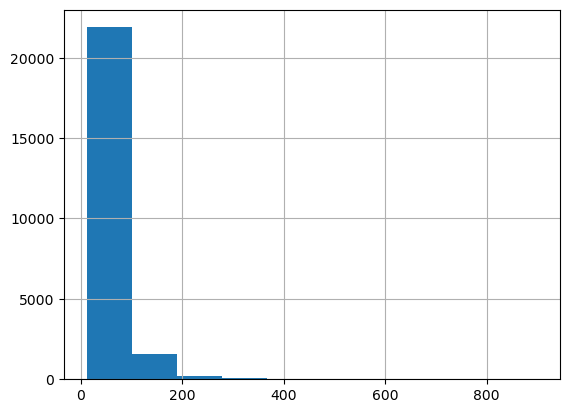

In [23]:
#Рассмотрим более детально столбец total_area, для этого построим гистограмму и посмотрим основные показели.  
data['total_area'].hist()
data['total_area'].describe()

Судя по гистограмме существуют несколько квартир, которые выбиваются из общей квартиры. Эти квартиры сильно большие. 
Для того чтобы более детально проанализировать данные, мы приняли решение убрать из анализа слишком большие квартиры, которые больше 200 кв. метров


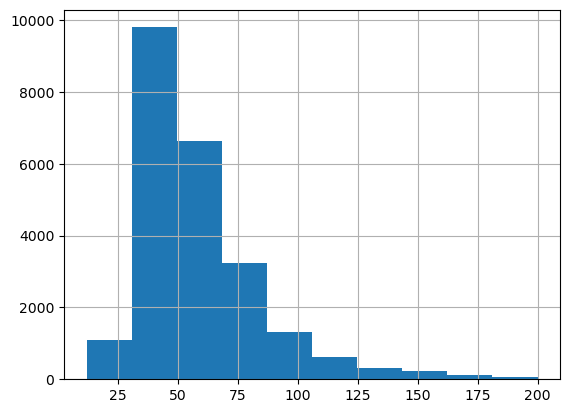

In [24]:
data = data[data['total_area'] <= 200] #методом loc убираем из данных строки с силько большими квартирами
data['total_area'].hist() #Проверяем результат
plt.show()

In [25]:
#Проведём финальную проверку данных на пропуски и дубликаты. 
data.isna().sum()

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
cityCenters_nearest     0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

In [26]:
data.duplicated().sum()

0

_Вывод по второму этапу проекта_

* Пропуски

В данном этапе проекта была проведена объёмная работа по избавлению данных от пропусков. В 13 столбцах данных были обнаружены пропуски. В большенстве из них была проведена замена пропусков медианным значением (ceiling_height, floors_total, living_area, kitchen_area, airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest). В таких столбцах, как is_apartment, balcony, locality_name, parks_nearest, ponds_nearest, days_exposition пустые строки заменены на False, 0 или 'неизвестно'. 

* Изменение типа данных

Также в некоторых столбцах был изменён тип данных на целочисленнные. В столбце floors_total показывается общее количество этажей в доме, навряд ли будет дом с 9 и 3/4 этажей) Также в квартире может быть только целое цисло балконов, рядом может быть только цело число прудов и парков. Поэтому данные заменены на целочисленные. Кроме того, количество дней, сколько было размещено объявление было принято привести к целочисленному формату для удобства анализа. 

* Аномалии в данных

В данных по высоте потолков (ceiling_height) присудствовали аномально высокие значения. Скорее всего при заполнении объявления собственики делали ошибку, на вряд ли потолки в квартирах будут более 10 метров. Поэтому было принято решение поделить на 10 значения которые больше 10 метров. 
Также была замечена аномалия в данных по количеству этажей в дома (floors_total). Самые высокие дома были этажностью в 52 этажа и 60 этажей. И если дом в 52 этажа в Санкт-Петербурге существуют, то дом с 60 этажами в Кронштадте вряд ли есть. Скорее всего это была случайная ошибка в данных, поэтому было принято решение удалить 0 и оставить 6. 6-ти этажный дом более правдоподомен в Кронштадте.
Мы убрали слишком большие квартиры (более 200 кв. метров) для того чтобы более детально рассмотреть распределения по основному масиву данных.  

* Дубликаты

Кроме того, мы удалили неявные дубликаты в столбце locality_name, для того чтобы не было путаницы в названиях и можно было бы сгрупировать данные относительно местоположения в будущем анализе. Таким образом мы получили столбец в котором названия населённых пунктов встречается лишь раз.





### Посчитайте и добавьте в таблицу новые столбцы

In [27]:
#Добавим столбец в котором указана цена одного квадратного метра.
data['price_one_square'] = round(data['last_price']/data['total_area']) #Сразу округлим разультат, чтобы данные были более читабельны. 

In [28]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')# Методом pd.to_datetime() мы перевели значения столбца first_day_exposition в таблице data в объекты datetime.
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_one_square
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,0,120370.0
1,7,3350000.0,40.4,2018-12-04,1,2.63,11,18.600000,1,False,...,2,Шушары,12817.0,18603.0,0,460.0,0,584.5,81,82921.0
2,10,5196000.0,56.0,2015-08-20,2,2.70,5,34.300000,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92786.0
3,0,64900000.0,159.0,2015-07-24,3,2.70,14,91.730769,9,False,...,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424,408176.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.0


In [29]:
#Добавим столбец в котором указан день недели публикации объявления (0 — понедельник, 1 — вторник и так далее).
data['weekday'] = data['first_day_exposition'].dt.weekday

In [30]:
#Добавим столбец в котором указан месяц публикации объявления.
data['month'] = data['first_day_exposition'].dt.month

In [31]:
#Добавим столбец в котором указан год публикации объявления.
data['year'] = data['first_day_exposition'].dt.year

In [32]:
#Добавим столбец в котором указан тип этажа квартиры (значения — «первый», «последний», «другой»).
def first_last_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['first_last_floor'] = data.apply(first_last_floor, axis=1)

In [33]:
#Добавим столбец в котором указано расстояние до центра города в километрах (переведите из м в км и округлите до целых значений).
data['km_to_center'] = round(data['cityCenters_nearest'] // 1000)

По итогу проведённой работы успешно добавлены 6 дополнительных колонок. 

### Проведите исследовательский анализ данных

На данном этапе мы более детально расмотрим показатели и сделаем по ним общие выводы.

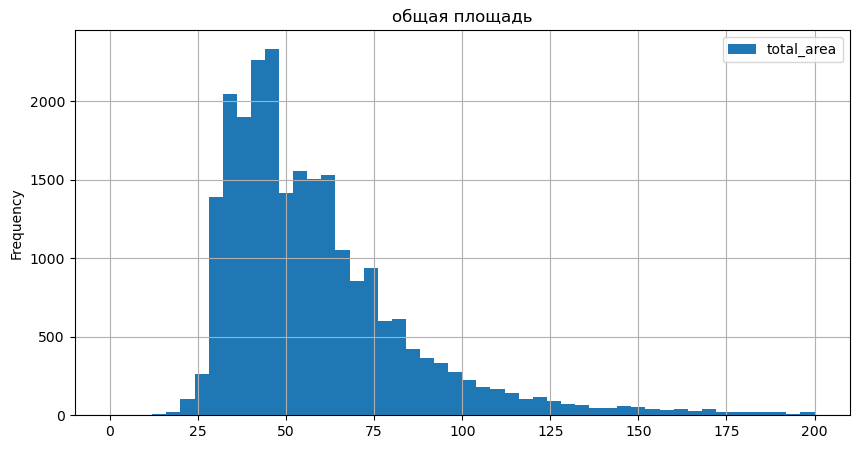

In [34]:
data.plot(kind='hist', y='total_area', title='общая площадь', bins=50, grid=True, figsize=(10,5), range=(0,200)) 
plt.show()

Судя по гистограмме, данные по общей площади имеют выраженный всплеск на показателях от 35 до 50 квадратных метров. Исходя из этого, можно сказать, что в основном выставляются квартиры на продажи с небольшой площадью. После сильного всплеска в 45 кв. метров, данные потихоньку идут на убыль. Однако на графике есть и другие всплески при площади квартир в 55 кв. метров, 75 кв. метров и 80 кв. метров. Это показывает на то, что квартиры с анной площадью наиболее популярны в Ленинградской области. 

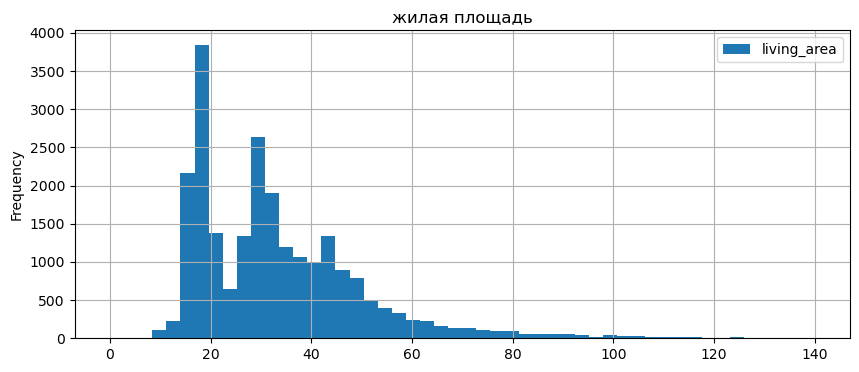

In [35]:
data.plot(kind='hist', y='living_area', title='жилая площадь', bins=50, grid=True, figsize=(10,4), range=(0,140)) 
plt.show()

Данные по жилой площади достаточно сильно разбросаны, есть сильный просадок на показателе в 25 квадратных метра. Пиковые значение находятся на уровне 18, 25 и 45 кв. метров. 

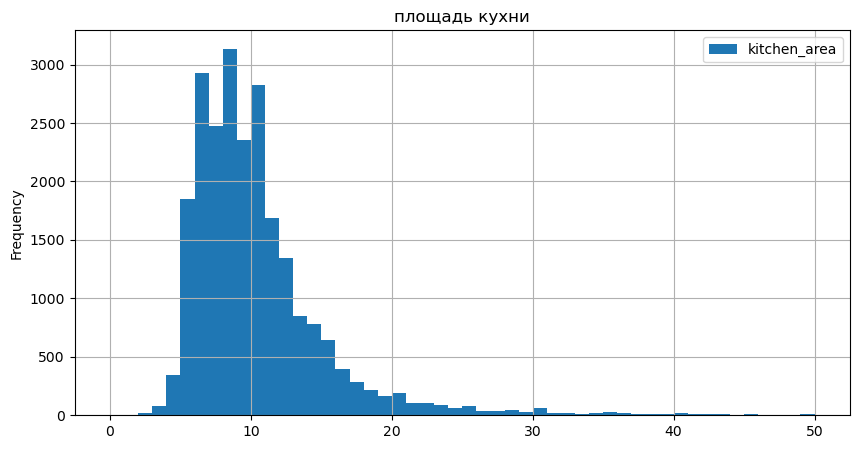

In [36]:
data.plot(kind='hist', y='kitchen_area', title='площадь кухни', bins=50, grid=True, figsize=(10,5), range=(0,50)) 
plt.show()

Площадь кухни в основном занимает от 7 кв. метров до 11 кв. метров. После этого показатель идёт на убыль. Максимальный размер кухни равен примерно 50 кв. метров. 

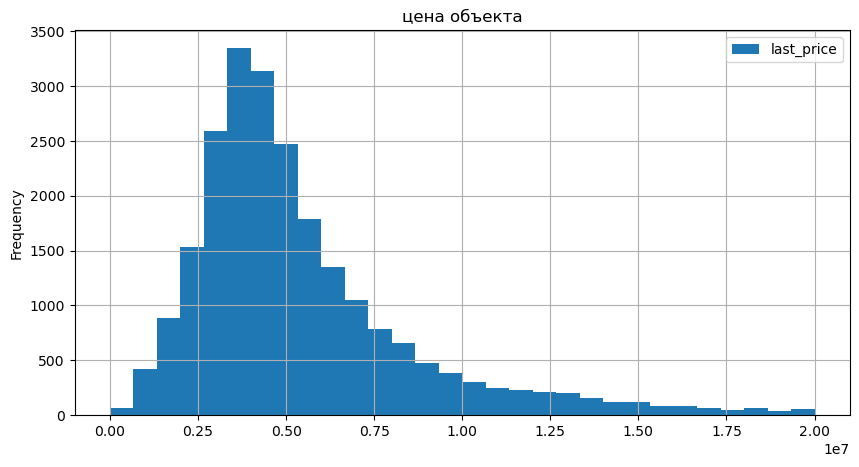

In [37]:
data.plot(kind='hist', y='last_price', title='цена объекта', bins=30, grid=True, figsize=(10,5), range=(0,20000000)) 
plt.show()

В данных есть пиковое значение от 2,5 млн. до 5 млн. рублей. После 7,5 млн. идёт сильный разброс в данных до 20 млн. 

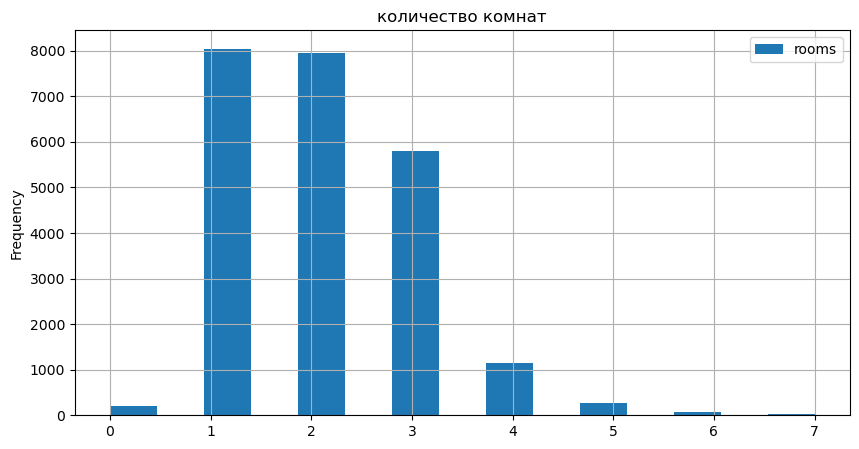

In [38]:
data.plot(kind='hist', y='rooms', title='количество комнат', bins=15, grid=True, figsize=(10,5), range=(0,7)) 
plt.show()

Наиболее популярны квартиры с 1 или 2 комнатами, чуть менее популярны трехкомнатные квартиры. Также на рынке представлены квартиры с 6 и 7 комнатами, но их количество на рынке минимально. 

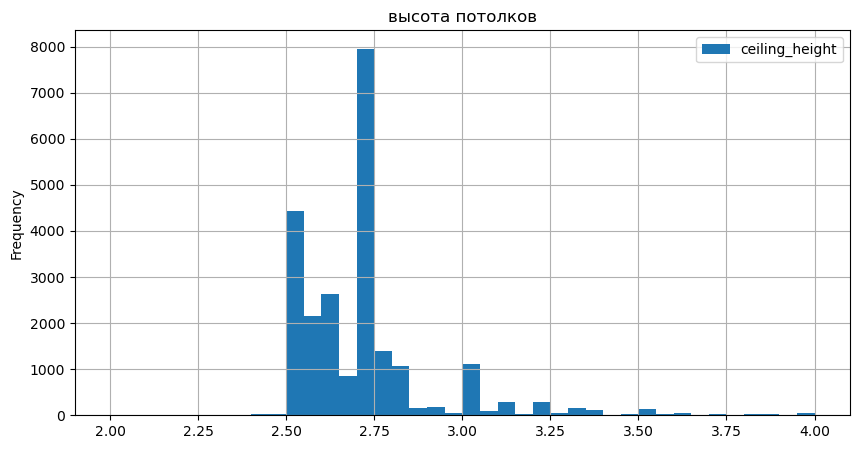

In [39]:
data.plot(kind='hist', y='ceiling_height', title='высота потолков', bins=40, grid=True, figsize=(10,5), range=(2,4)) 
plt.show()

Наиболее популярны квартиры с поторлками 2,5 метров и 2,75. Такие квартиры встречаются чаще всего. Также достаточно часто встречаются квартирыы с трёхметровыми потолками.   

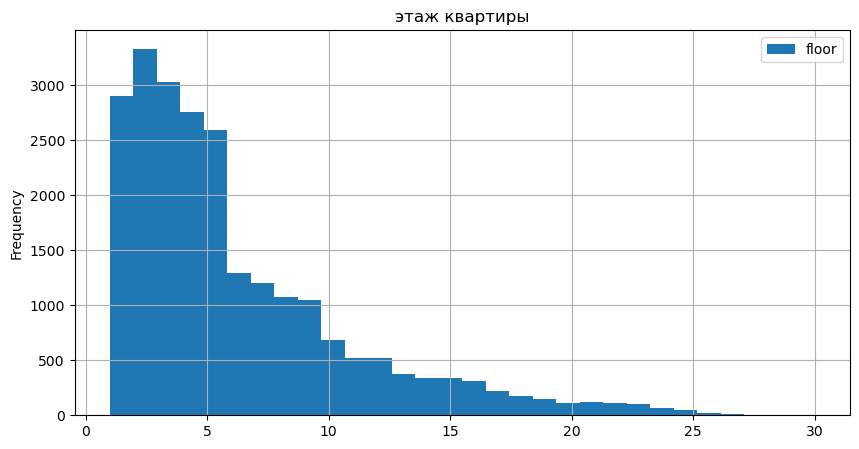

In [40]:
data.plot(kind='hist', y='floor', title='этаж квартиры', bins=30, grid=True, figsize=(10,5), range=(1,30)) 
plt.show()

В онсновном продаются квартиры на низком этаже, от 1 до 5 этажа. Возможно это связано с распростроненностью пятиэтажных зданий в Ленинградской области. 

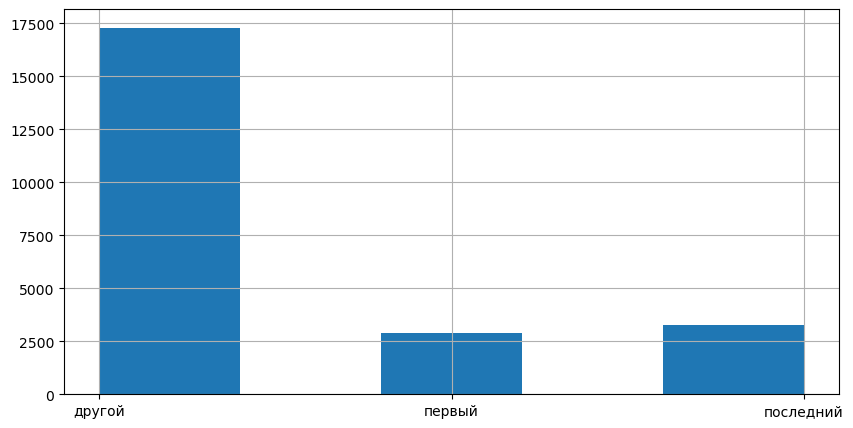

In [41]:
data['first_last_floor'].hist(bins=5, figsize=(10,5)) 
plt.show()

В основном квартиры продаются на промежуточных этажах, далее по популярности идет последний этаж. Наименее популярный первый этаж для продажи квартиры. 

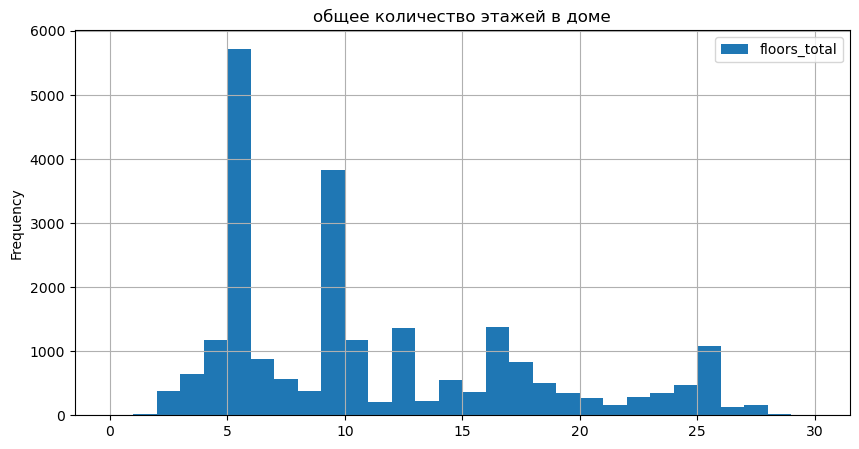

In [42]:
data.plot(kind='hist', y='floors_total', title='общее количество этажей в доме', bins=30, grid=True, figsize=(10,5), range=(0,30)) 
plt.show()

Судя по графику мы видим несколь пиковых значений параметра "общее количество этажей в доме": 5, 9, 12, 16 и 25. Такая этажность зданий наиболее популярнв и распространенна не только в Ленинградской области, но и по всей России. 

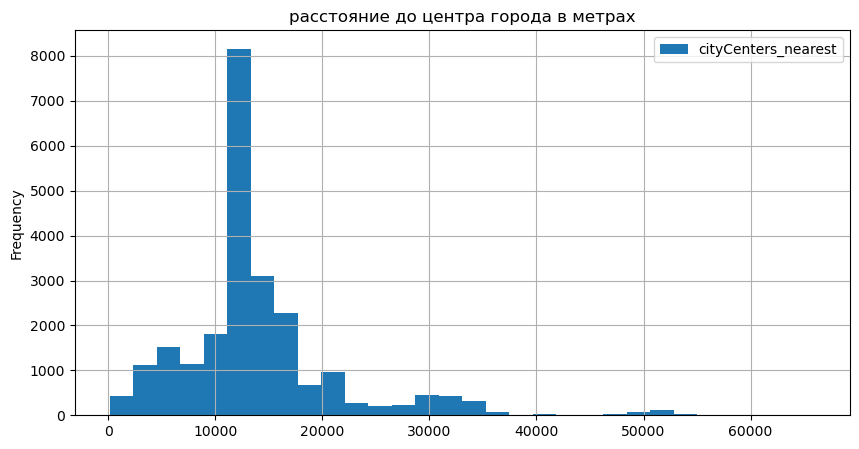

In [43]:
data.plot(kind='hist', y='cityCenters_nearest', title='расстояние до центра города в метрах', bins=30, grid=True, figsize=(10,5))
plt.show()

В основном квартиры находятся не сильно далеко от центра в 10 - 15 км от центра. 

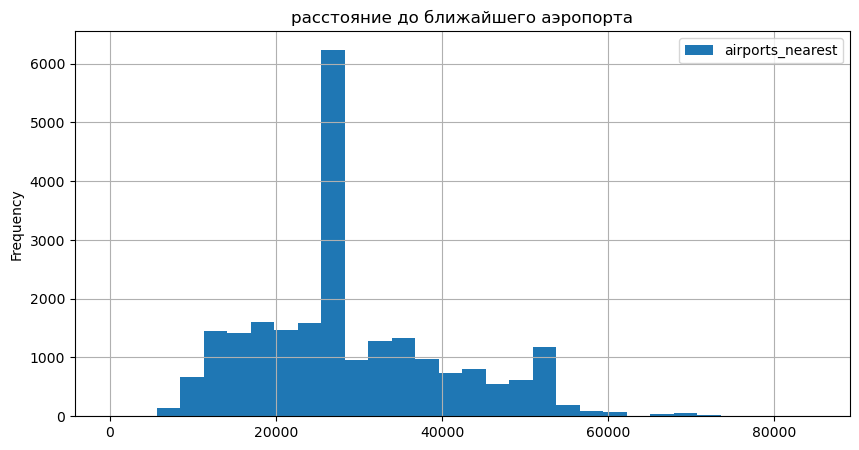

In [44]:
data.plot(kind='hist', y='airports_nearest', title='расстояние до ближайшего аэропорта', bins=30, grid=True, figsize=(10,5)) 
plt.show()

Расстояние до ближайщего аэропорта на каждом объекте сильно развлечается и составляет от 10 км до 70 км. Однако есть выраженные пиковые значения на уровне 25 км и 55 км. это может быть связано с тем, что мы заменяли пустые строки медианным значением по каждома населённому пункту. 

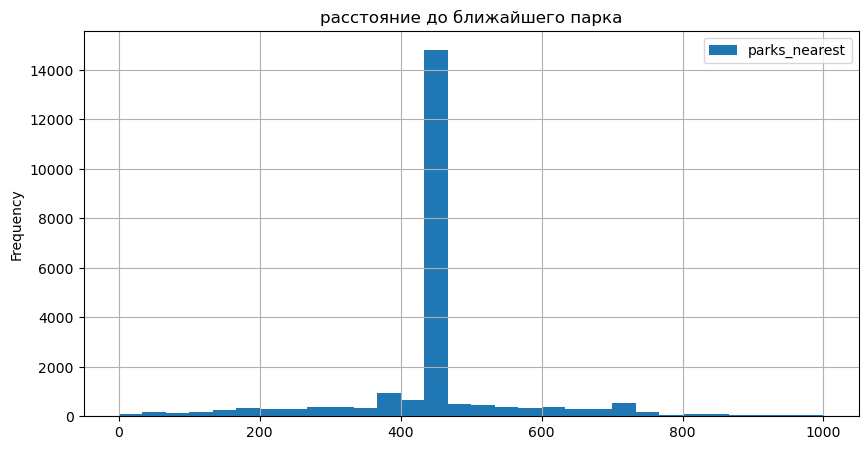

In [45]:
data.plot(kind='hist', y='parks_nearest', title='расстояние до ближайшего парка', bins=30, grid=True, figsize=(10,5), range=(0,1000))

plt.show()

Значительно выражен пик на уровне 500 метров до ближайшего парка. 

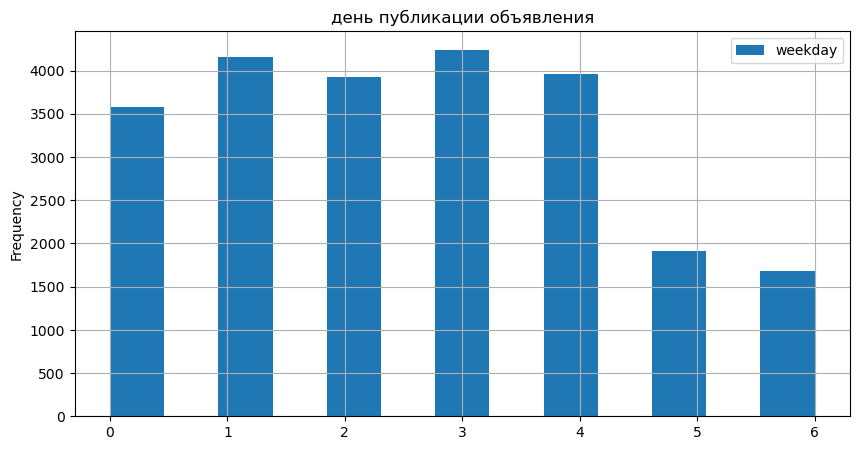

In [46]:
data.plot(kind='hist', y='weekday', title='день публикации объявления', bins=13, grid=True, figsize=(10,5), range=(0,6)) 
plt.show()

Наименьшее количество объявлений наблюдается в выходные дни. На выходных люди в два раза меньше выкладывают объявления о продаже квартиры.

Объявления публикуются в разные дни практически равномерно, но есть видные пики за 1 число и 10 число месяца. 

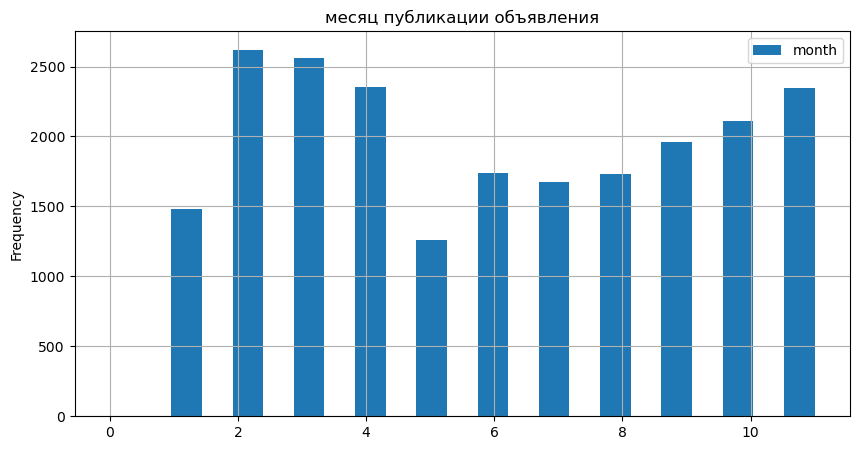

In [47]:
data.plot(kind='hist', y='month', title='месяц публикации объявления', bins=23, grid=True, figsize=(10,5), range=(0,11))
plt.show()

Наименее часто публикуются объявлени в Январе и Мае, это может быть связано с продолжительными праздниками в этот период. Также видно, что в летние месяцы публикуют меньше объявлений чем в другие. 

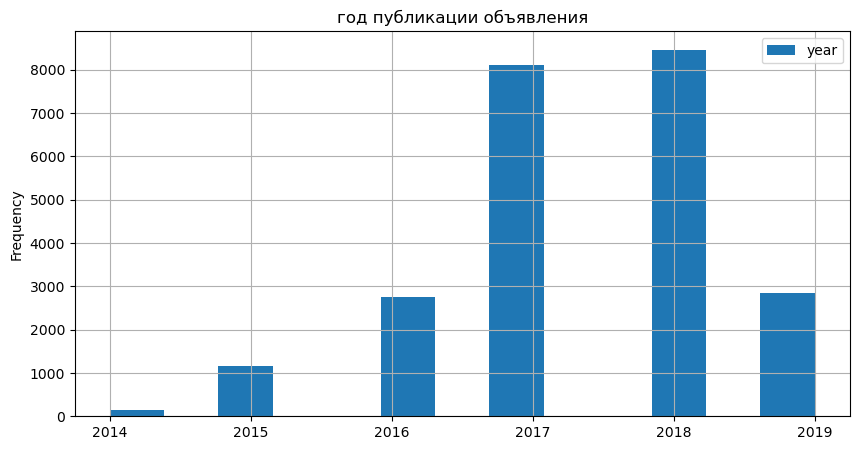

In [48]:
data.plot(kind='hist', y='year', title='год публикации объявления', bins=13, grid=True, figsize=(10,5), range=(2014,2019))
plt.show()

Судя по гистограмме, мы видим, что в 2014 сервис Яндекс.Недвижимость только начал своё развитие. С каждым годом объявлений на сайте всё больше. В 2019 годы мы видим просадок, но скорее всего это связано с тем, что нам выгрузили неполные данные за 2019 год. 

Изучим, как быстро продавались квартиры. 

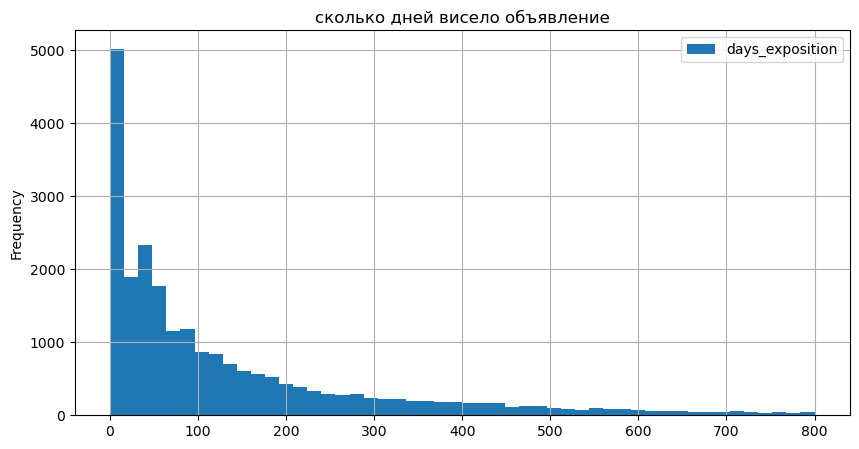

In [49]:
data.plot(kind='hist', y='days_exposition', title='сколько дней висело объявление', bins=50, grid=True, figsize=(10,5), range=(0,800))
plt.show()

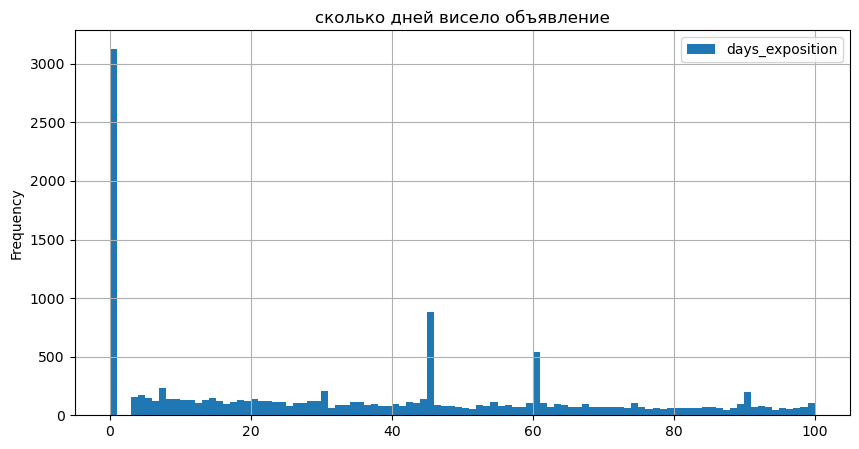

In [50]:
#Рассмотрим график более детально 
data.plot(kind='hist', y='days_exposition', title='сколько дней висело объявление', bins=100, grid=True, figsize=(10,5), range=(0,100)) 
plt.show()

На детальном графике мы видим необычные всплески на значениях 0, 45 и 60. Если объявление висело 0 дней на сайте это можно объяснить фактором ошибок. Возможно люди выставляют объявление, замечают ошибку и сразу удаляют его для того чтобы переделать и уже выставить на более долгий срок. Возможно также сама система Яндекс.Недвижимость не пропускает некоторые объявления, которые требуют дороботки и удаляет их самостоятельно. Что касается двух других выбросов в 45 и 60 дней, возможны также два варианта.  1)Существует негласное правило сколько дольшно быть размещено объявление, и после этого срока люди его меняют или снимают вовсе. 2)Система Яндекс.Недвижимость автоматически перестает показывать объявления старше 45 или 60 дней и люди выставляют заново, чтобы на платформе показывалось их объявление.

Распределение данного показателя соответствует распределению Пуассона, что характерно для ременных показателей. 

In [51]:
data['days_exposition'].mean() #Посчитаем среднее 

155.7611622358555

In [52]:
data['days_exposition'].median() #Посчитаем медиану

73.0

В среднем объявления висят на сайте около 155 дней, однако если считать медианное значение, то оно равно 73.
Обычними продажами можно назвать те, которые занимают менее 155 дней. Судя по гистограмме таких продаж большенство. Если объявление висит дольше, значит с ним что то не так и нужно что то изменить. Зачастую следует менять стоимость объекта. 

Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Далее мы изучим, зависит ли цена от:
общей площади;
жилой площади;
площади кухни;
количества комнат;
этажа, на котором расположена квартира (первый, последний, другой);
даты размещения (день недели, месяц, год).

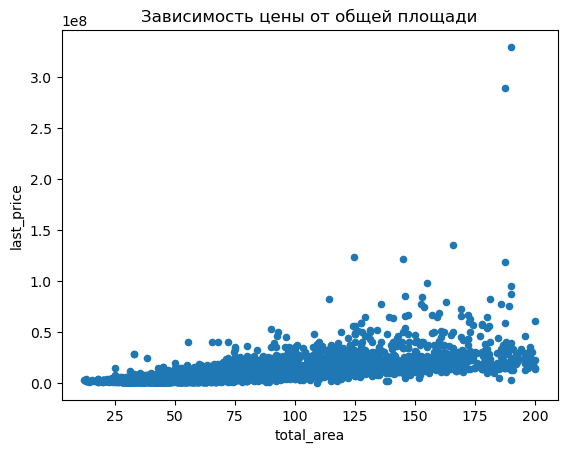

In [53]:
#Построим диаграмму рассеивания для параметров last_price и total_area
data.plot(x='total_area', y='last_price', kind='scatter', title='Зависимость цены от общей площади')
plt.show()

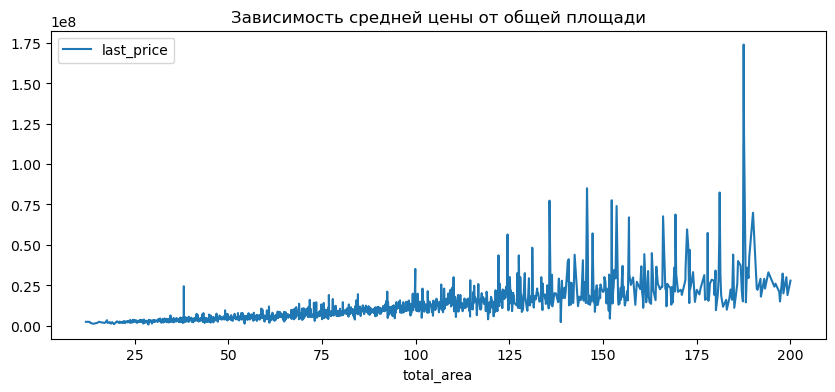

In [54]:
data.pivot_table(index='total_area', values='last_price')\
.plot(style='-',title='Зависимость средней цены от общей площади', figsize=(10,4))
plt.show()

In [55]:
#Найдём коэффицент Пирсона для анализа взаимосвязи данных параметров. 
print('Коэффициент корреляции цены и общей площади', round(data['total_area'].corr(data['last_price']), 3))

Коэффициент корреляции цены и общей площади 0.659


На основе коэффицента Пирсона мы можем сделать вывод, что параметры общая площадь и итоговая цена положительно коррелируют друг с другом. Таким образом общая площадь влияет на итоговую стоимость квартиры. Чем выше площадь, тем дороже квартира. 

Коэффициент корреляции цены и жилой площади 0.556


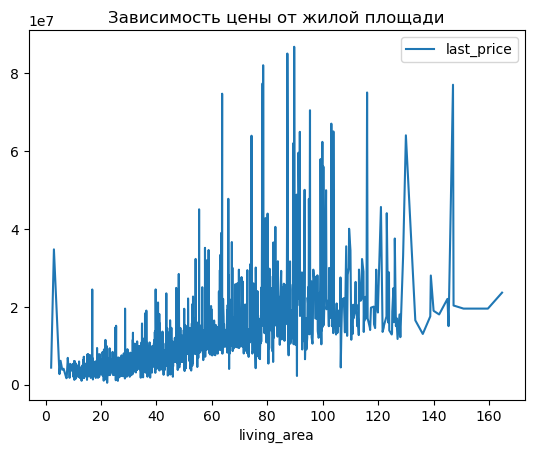

In [56]:
#Построим график зависимости для параметров last_price и living_area
data.pivot_table(index='living_area', values='last_price')\
.plot(style='-', title='Зависимость цены от жилой площади')
#Найдём коэффицент Пирсона для анализа взаимосвязи данных параметров. 
print('Коэффициент корреляции цены и жилой площади', round(data['living_area'].corr(data['last_price']), 3))
plt.show()

Параметры жилая площадь и итоговая цена зависят друг от друга, но не так сильно как общая площадь и итоговая цена.  Корреляция равна 0,556. 

Коэффициент корреляции цены и площади кухни 0.536


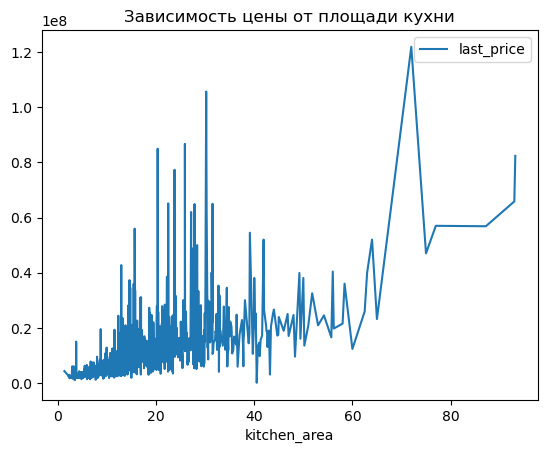

In [57]:
#Построим график зависимости для параметров last_price и kitchen_area
data.pivot_table(index='kitchen_area', values='last_price')\
.plot(style='-', title='Зависимость цены от площади кухни')
#Найдём коэффицент Пирсона для анализа взаимосвязи данных параметров. 
print('Коэффициент корреляции цены и площади кухни', round(data['kitchen_area'].corr(data['last_price']), 3))
plt.show()

Параметры площади кухни и итоговая цена зависят друг от друга. Корреляция равна 0,536.

Коэффициент корреляции цены и количества комнат 0.38


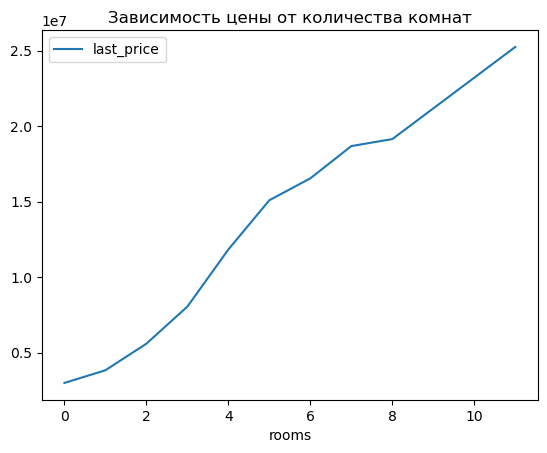

In [58]:
#Построим график зависимости для параметров last_price и rooms
data.pivot_table(index='rooms', values='last_price')\
.plot(style='-', title='Зависимость цены от количества комнат')
#Найдём коэффицент Пирсона для анализа взаимосвязи данных параметров. 
print('Коэффициент корреляции цены и количества комнат', round(data['rooms'].corr(data['last_price']), 3))
plt.show()

Количество комнат уже не так сильно влияют на итоговую стоимость квартиры, как предидущие параметры. Корреляция равна 0,38.

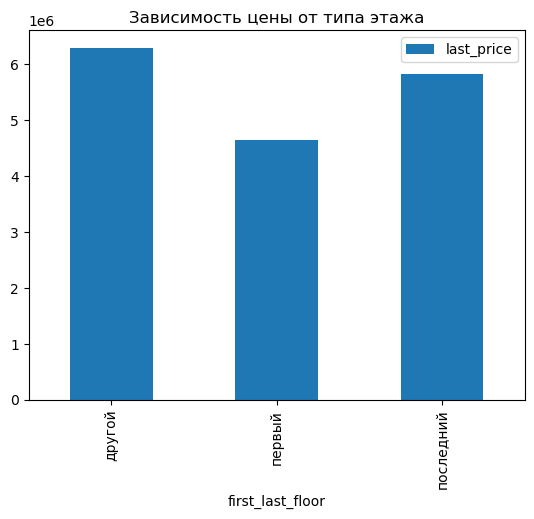

In [59]:
#Построим столбчатый график для параметров last_price и first_last_floor
data.pivot_table(index='first_last_floor', values='last_price')\
.plot(style='-', kind='bar', title='Зависимость цены от типа этажа') 
plt.show()

In [60]:
print('Коэффициент корреляции цены и первого этажа', round((data['first_last_floor']=='первый').corr(data['last_price']), 3))
print('Коэффициент корреляции цены и последнего этажа', round((data['first_last_floor']=='последний').corr(data['last_price']), 3))
print('Коэффициент корреляции цены и другого этажа', round((data['first_last_floor']=='другой').corr(data['last_price']), 3))
print('Коэффициент корреляции цены и типа этажа', round(data['floor'].corr(data['last_price']), 3))

Коэффициент корреляции цены и первого этажа -0.083
Коэффициент корреляции цены и последнего этажа -0.012
Коэффициент корреляции цены и другого этажа 0.072
Коэффициент корреляции цены и типа этажа 0.043


Судя по графикам и вычеслениям корреляции, тип этажа плактически не оказывает влияния на цену квартиры. Также можем сказать, что за первый этаж чаще просят меньше всего, также последний этаж снижает цену на квартиру. Однако, если рассматривать остальные этажи, то взаимосвязи между ними и ценой парктически нет. 

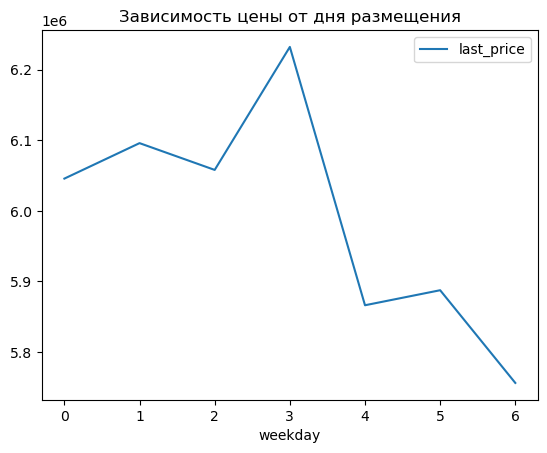

In [61]:
#Построим график зависимости для параметров last_price и day
data.pivot_table(index='weekday', values='last_price')\
.plot(style='-', title='Зависимость цены от дня размещения')
plt.show()

Параметры день резмещения и итоговая цена квартиры не имеют взаимосвзяти.

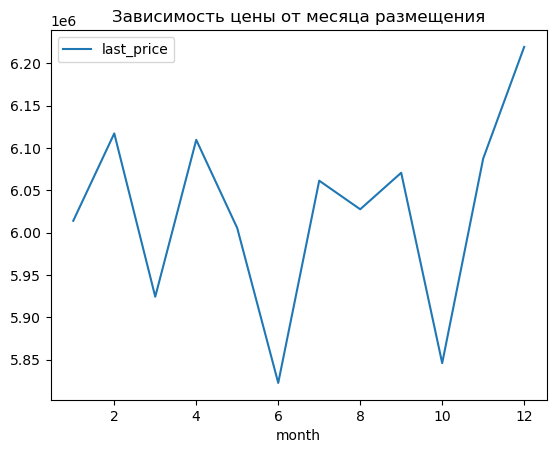

In [62]:
#Построим график зависимости для параметров last_price и month
data.pivot_table(index='month', values='last_price')\
.plot(style='-', title='Зависимость цены от месяца размещения')
plt.show()

Параметры месяц резмещения и итоговая цена квартиры не имеют взаимосвзяти.

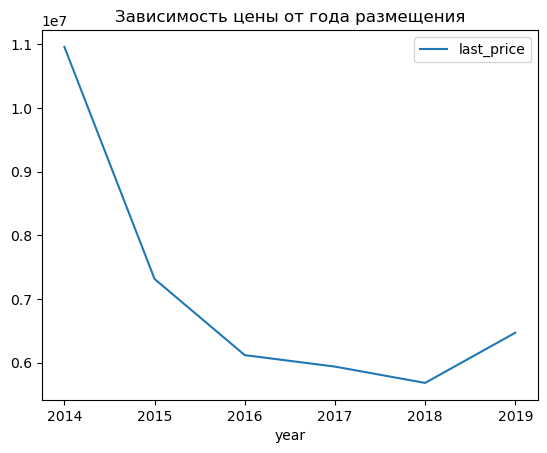

In [63]:
#Построим график зависимости для параметров last_price и year
data.pivot_table(index='year', values='last_price')\
.plot(style='-', title='Зависимость цены от года размещения')
plt.show()

Итоговая цена минимально зависит от года размещения объявления. Однако скорее всего это ошибка, так как данных не равномерное количество по годам. В будущем, рассматривая большее количество лет с примерно одинаковым количеством объявлений скорее всего данные параметры будут не зависимы. 

Далее посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. А также выделим населённые пункты с самой высокой и низкой стоимостью квадратного метра. 

In [64]:
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'last_price'), ascending=False).head(10)\
.sort_values(('mean', 'last_price'), ascending=False)

,count,mean,median
,last_price,last_price,last_price
locality_name,,,
Санкт-Петербург,15508,7.317010e+06,5500000.0
Пушкин,364,6.153453e+06,5150000.0
Парголово,326,4.477609e+06,4100000.0
Кудрово,472,4.358688e+06,3890000.0
Шушары,440,4.108082e+06,3950000.0
Колпино,337,3.866289e+06,3600000.0
Всеволожск,398,3.789068e+06,3450000.0
Мурино,590,3.678462e+06,3400000.0


In [65]:
#Мы увидели мольшое количество данных с пустым значением. Исключим их для более детального анализа. 
data = data.loc[data['locality_name'] != ''] 
#Возможно данная ошибка технического характера и нам следует обратить на неё внимание в дальнейшей работе с данными. 

In [66]:
#Посмотрим заново среднюю цену квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
data.pivot_table(index='locality_name', values='last_price', aggfunc=['count', 'mean', 'median'])\
.sort_values(('count', 'last_price'), ascending=False).head(10)\
.sort_values(('mean', 'last_price'), ascending=False)

,count,mean,median
,last_price,last_price,last_price
locality_name,,,
Санкт-Петербург,15508,7.317010e+06,5500000.0
Пушкин,364,6.153453e+06,5150000.0
Парголово,326,4.477609e+06,4100000.0
Кудрово,472,4.358688e+06,3890000.0
Шушары,440,4.108082e+06,3950000.0
Колпино,337,3.866289e+06,3600000.0
Всеволожск,398,3.789068e+06,3450000.0
Мурино,590,3.678462e+06,3400000.0


Наибольшее количество объявлений в Санкт-Петербурге, замыкает топ-10 по количеству объявлений Выборг. 
Наибольшая средняя цена в Санкт-Петербурге, наименьшая в Выборге. 

Расчитаем как влияет отдаленность от центра на стоимость квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра.

In [67]:
km_spb = data[data['locality_name'] == 'Санкт-Петербург']\
.pivot_table(index='km_to_center', values='last_price', aggfunc=['mean'])
km_spb

,mean
,last_price
km_to_center,
0.0,1.643704e+07
1.0,1.552871e+07
2.0,1.233836e+07
3.0,1.052264e+07
4.0,1.164456e+07
5.0,1.220851e+07
6.0,1.261837e+07
7.0,1.066061e+07


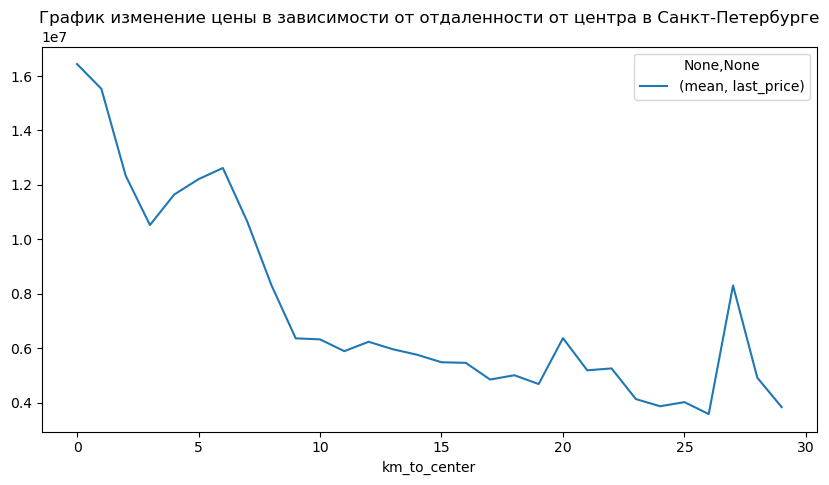

In [68]:
#Построим график зависимости для параметров last_price и km_to_center в Санкт-Петербурге. 
km_spb.plot(style='-',title='График изменение цены в зависимости от отдаленности от центра в Санкт-Петербурге', figsize=(10,5))
plt.show()

На основе нашего графика, мы видим, что чем квартира дальше от центра, тем она дешевле. Кроме того, есть всплеск цены на показателе 27 км. Возможно это связянно с элитным районом в Питере, который находится в 27 км от центра Питера. 



Судя по графику центром Питера можно считать зону в 7-10 км. Именно на этом отрезке мы видим сильный спад цены.

Таким образом, на основе нашего анализа,мы проанализировали основные характерискики и обнаружили параметры, которые влияют на стоимость квартиры в Ленинградской области. Такими параметрами являются: Общая площадь, жилая площадь, площадь кухни и количество комнат. Кроме того, показатель типа этажа (первый, последний, другой) также имеет незначительное влияние на цену квартиры. Влияние параметра отдалённость от центра на итоговую цену квартиры мы увидели на примере Санкт-Петербурга. В остальных городах Ленинградской области скорее всего этот параметр будет не так сильно влиять на стоимость квартиры. 

### Общий вывод

В данном исследовании сначала мы провели предобработку данных, в неё входило: удаление неявных дубликатов в столбце с наименованием населённых пунктов, замена медианным значением пропусков в параметрах, замена пропусков на 0, "неизвестно" и False. Кроме того, данные были проверены на аномалии и проведено удаление этих аномалий. Также в некоторых данных мы изменили тип данных. Добавленны дополнительные столбцы для расширенного анализа данных. 

Далее в исследовнии рассмотрели основные параметры и построены гистограммы для каждого из них. Изучено как быстро продаются квартиры и какие параметры влияют наиболее сильно на итговую цену квартиры. 

##### Параметры которые наиболее сильно влияют на цену квартиры. 
Общая площадь, жилая площадь, площадь кухни и количество комнат наиболее сильно влияют на стоимость квартиры. Коэфицент Пирсона между данными показателями и стоимостью квартиры составляет 0,5, 0,5 и 0,3 соответственно. 
Чем выше общая площадь, жилая площадь или площадь кухни, тем выше стоимость квартиры. 
Чем больше комнат в квартире, тем выше стоимость. 
Кроме того, показатель типа этажа (первый, последний, другой) также имеет незначительное влияние на цену квартиры. 
Первый этаж стоит дешевле всего, он сильно снижает стоимость квартиры. Последний этаж также снижает стоимость квартиры, но не так сильно как первый этаж. Если этаж не первый и не последний, стоимость не варьируется среди других этажей. 

##### Сроки продажи квартиры. 
Средним сроком продажи квартиры является около 155 дней. 

##### Распределение стоимости квартиры в зависимости от расположения. 
Наиболее дорогой квадратный метр квартиры в Санкт-Петербурге. Средняя цена квартиры составляет 7,3 млн рублей. Последним городом в топ-10 является Выборг. Средняя стоимость квартиры там составляет 3,2 млн. рублей. 

##### Зависимость цены квартиры от отдаленности от центра в Санкт-Петербурге. 
Цены на квартиры зависят от отдаленности от центра в Санкт-Петербурге. Чем дальше от центра, тем квартира там дешевле. 